# Python for Data Science

Python is a general-purpose programming language that is becoming ever more popular for data science. Companies worldwide are using Python to harvest insights from their data and gain a competitive edge. This notebook focuses on Python specifically for data science. You’ll learn about powerful ways to store and manipulate data, and helpful data science tools to begin conducting your own analyses. Specifically we will cover following topics in this notebook:
* Importing Python Libraries
* Reading csv file from Pandas
* Use of apply function 
* Data Visualization using Matplotlib
* Use of Numpy functions

Pandas will be a major tool of interest throughout the course. It
contains data structures and data manipulation tools designed to make data cleaning
and analysis fast and easy in Python. Pandas is often used in tandem with numerical
computing tools like NumPy and SciPy, analytical libraries like statsmodels and
scikit-learn, and data visualization libraries like matplotlib.Throughout the rest of the notebook, I use the following import convention for pandas:
*import pandas as pd* .Thus, whenever you see pd. in code, it’s referring to pandas

## Importing python libraries 

In [1]:
import pandas as pd  #for data analysis and manipulation
import numpy as np  #for numerical computing
import matplotlib.pyplot as plt #for data visualization

## Importing data using Pandas Data Frame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string,boolean, etc.). The DataFrame has both a row and column index.

In [2]:
data = pd.read_csv('car_data.csv')

In [3]:
data

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.head() #the head method selects only the first five rows

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0


We see that our data is mix of both Numeric and Categorical attributes. The attributes Selling_Price is in ($ 100,000). Let us see the summary of the data

In [5]:
data.describe() #describe method gives 8 point summary of our numeric data

,Year,Selling_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,36947.205980,0.043189
std,2.891554,5.082812,38886.883882,0.247915
min,2003.000000,0.100000,500.000000,0.000000
25%,2012.000000,0.900000,15000.000000,0.000000
50%,2014.000000,3.600000,32000.000000,0.000000
75%,2016.000000,6.000000,48767.000000,0.000000
max,2018.000000,35.000000,500000.000000,3.000000


In [6]:
print("The shape of data is : ",data.shape) #to see number of rows and columns in data
print(data.columns) #to display all the columns in our data

The shape of data is :  (301, 8)
Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [7]:
data.isnull().sum() #isnull methods returns Boolean value whether data is missing and sum will return its count

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data["Kms_Driven"] #to select an attribute from data frame

0      27000
1      43000
2       6900
3       5200
4      42450
       ...  
296    33988
297    60000
298    87934
299     9000
300     5464
Name: Kms_Driven, Length: 301, dtype: int64

## Use of .apply function

.apply() is a Pandas way to perform iterations on columns/rows. It takes advantage of vectorized techniques and speeds up execution of simple and complex operations by many times. Moreover, its syntax is easy to understand once you see a few examples.

In [9]:
#The following example passes a function and checks the value of each element in series and returns low, normal or High accordingly.
def price_range(num): 
  
    if num < 5: 
        return "Low"
  
    elif num >= 5 and num < 10: 
        return "Normal"
  
    else: 
        return "High"

In [10]:
#take an attribute 
Selling_price = data["Selling_Price"]

In [11]:
Selling_price

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [12]:
# passing function to apply and storing returned series in new 
new = Selling_price.apply(price_range)

In [13]:
new

0         Low
1         Low
2      Normal
3         Low
4         Low
        ...  
296    Normal
297       Low
298       Low
299      High
300    Normal
Name: Selling_Price, Length: 301, dtype: object

In [14]:
data['Price Category'] = new #create new column in the dataset

In [15]:
data

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price Category
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0,Low
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0,Low
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0,Normal
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0,Low
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0,Low
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,33988,Diesel,Dealer,Manual,0,Normal
297,brio,2015,4.00,60000,Petrol,Dealer,Manual,0,Low
298,city,2009,3.35,87934,Petrol,Dealer,Manual,0,Low
299,city,2017,11.50,9000,Diesel,Dealer,Manual,0,High


In [16]:
# Check distribution of categorical column

In [17]:
data['Price Category'].value_counts()

Low       193
Normal     80
High       28
Name: Price Category, dtype: int64

## Data Visualization with Matplotlib 

Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis. It may be a part of the exploratory process—for example,to help identify outliers or needed data transformations, or as a way of generating
ideas for models. For others, building an interactive visualization for the web may be
the end goal. Python has many add-on libraries for making static or dynamic visualizations, but I’ll be mainly focused on matplotlib and libraries that build on top of it.

Text(0.5, 1.0, 'Histogram of Selling Price')

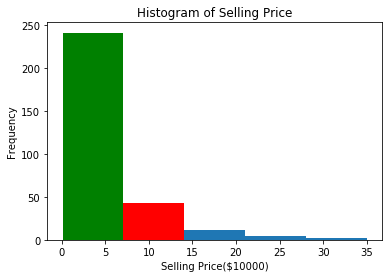

In [18]:
#simple histogram
n, bins, patches = plt.hist(x = data["Selling_Price"],bins =5)
plt.setp(patches[0], 'facecolor', 'g')
plt.setp(patches[1], 'facecolor', 'r')

plt.xlabel('Selling Price($10000)')
plt.ylabel('Frequency')
plt.title("Histogram of Selling Price")

In [19]:
bins

array([ 0.1 ,  7.08, 14.06, 21.04, 28.02, 35.  ])

In [20]:
n

array([241.,  43.,  11.,   4.,   2.])

## Numpy functions 

NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing and manipulation of data stored in arrays.

In [21]:
a = np.array([9,10,17,3]) # One-dimensional array

b = np.array([[3, 5, 2, 4], 
              [7, 6, 8, 8],
              [1, 6, 7, 7]])  # Two-dimensional array

c = np.array([[8, 1, 5, 9], 
              [8, 9, 4, 3],
              [0, 3, 5, 0]])  # Two-dimensional array

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array):

In [22]:
print("Dimenssion of array a is : ", a.ndim)
print("Shape of array a is :", a.shape)
print("Size of array a is = ", a.size)

Dimenssion of array a is :  1
Shape of array a is : (4,)
Size of array a is =  4


In [23]:
print("Dimenssion of array b is : ", b.ndim)
print("Shape of array b is :", b.shape)
print("Size of array b is 3 * 4 = ", b.size)

Dimenssion of array b is :  2
Shape of array b is : (3, 4)
Size of array b is 3 * 4 =  12


Let's look at the data of b and c

In [24]:
b

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [25]:
c

array([[8, 1, 5, 9],
       [8, 9, 4, 3],
       [0, 3, 5, 0]])

In [26]:
#multiplying a constant with array
scalar =  c*3
print(scalar)

[[24  3 15 27]
 [24 27 12  9]
 [ 0  9 15  0]]


In [27]:
#adding b and c because they have same dimensions
add = b + c
print(add)

[[11  6  7 13]
 [15 15 12 11]
 [ 1  9 12  7]]


In [28]:
# element wise multipication
multiply = b*c 
print(multiply)

[[24  5 10 36]
 [56 54 32 24]
 [ 0 18 35  0]]


In [29]:
#taking square of every element in c
square = b**2
print(square)

[[ 9 25  4 16]
 [49 36 64 64]
 [ 1 36 49 49]]


In [30]:
#are elements of b > than c
logical= b > c
print(logical)

[[False  True False False]
 [False False  True  True]
 [ True  True  True  True]]


In [31]:
b

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [32]:
np.min(b)           # Minimum of the flattened array

1

In [33]:
np.min(b, axis=0)   # Minima along the first axis which means the minimum in first column,second column and so on.

array([1, 5, 2, 4])

In [34]:
np.min(b,axis = 1) # Minima along the second axis which means the minimum of first row,second row and so on.

array([2, 6, 1])

In [35]:
np.max(b)         # Maximum of the flattened array

8

### numpy.argmin : Returns the indices of the minimum values along an axis
### numpy.argmax : Returns the indices of the maximum values along an axis
### Remember : Indexing in Python starts at 0

In [36]:
np.argmin(b,axis = 1,) #this means return the minimum index of array by looking at each row.

array([2, 1, 0], dtype=int64)

In [37]:
np.argmin(b,axis = 0,) #this means return the minimum index of array by looking at each column

array([2, 0, 0, 0], dtype=int64)

In [38]:
np.argmax(b,axis = 1,) #this means return the maximum index of array by looking at each row.

array([1, 2, 2], dtype=int64)

In [39]:
np.argmax(b,axis = 0,) #this means return the maximum index of array by looking at each column

array([1, 1, 1, 1], dtype=int64)

### End